# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Nicholas Anaya Putra]
- **Email:** [nicholasanayaputraa@gmail.com]
- **ID Dicoding:** [mc211d5y2247]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda berdasarkan musim?
- Pada jam berapa pengguna paling banyak menyewa sepeda dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip "/content/drive/MyDrive/submission/Bike-sharing-dataset.zip" -d "drive/My Drive/submission/"

Archive:  /content/drive/MyDrive/submission/Bike-sharing-dataset.zip
  inflating: drive/My Drive/submission/Readme.txt  
  inflating: drive/My Drive/submission/day.csv  
  inflating: drive/My Drive/submission/hour.csv  


###Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv('/content/drive/MyDrive/submission/day.csv')
df_hour = pd.read_csv('/content/drive/MyDrive/submission/hour.csv')

df_day.head()
df_hour.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_day.shape, df_hour.shape

((731, 16), (17379, 17))

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- data dipanggil menggunakan pandas
- untuk df_day ada 731 rows dan 16 columns dan df_hour ada 17379 rows dan 17 columns
- data bersifat integer object dan float

### Assessing Data

In [ ]:
df_day.isna().sum()
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
df_day.duplicated().sum()
df_hour.duplicated().sum()

0

In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- dari kedua data diatas tidak ada missing value
- juga tidak ada duplicate data yang sama

### Cleaning Data

In [ ]:
df_day.dropna(axis=0, inplace=True)

In [ ]:
df_hour.dropna(axis=0, inplace=True)

In [ ]:
df_day.shape, df_hour.shape

((731, 16), (17379, 17))

In [ ]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- karena tidak ada data yang duplicate dan kosong atau NaN tidak ada yang di drop

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
print("\nStatistik deskriptif dataset harian:")
print(df_day.describe())

print("\nStatistik deskriptif dataset per jam:")
print(df_hour.describe())


Statistik deskriptif dataset harian:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0

**Insight:**
- Kolom numerik seperti temp, hum, windspeed berisi angka desimal (float64).
- Kolom tanggal (dteday) adalah object dan bisa diubah menjadi tipe datetime.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-37-47e1ab8262a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_day['season'], y=df_day['cnt'], palette="coolwarm")


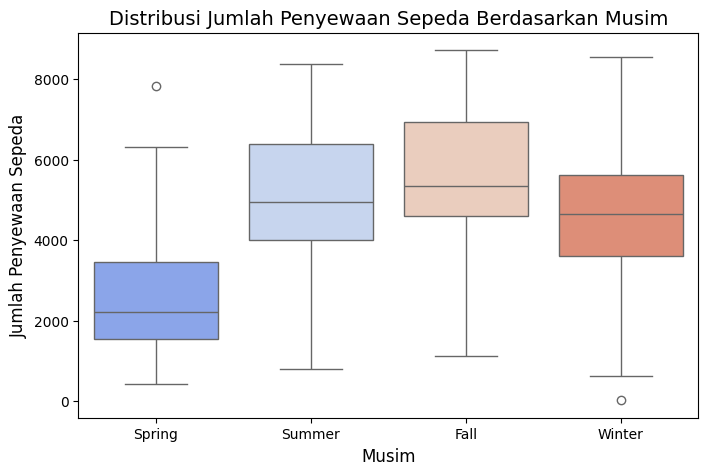

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_day['season'], y=df_day['cnt'], palette="coolwarm")
plt.xticks([0, 1, 2, 3], ["Spring", "Summer", "Fall", "Winter"])
plt.title("Distribusi Jumlah Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
plt.show()

### Pertanyaan 2:

<ipython-input-38-e8549750ac4f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_hour, x="hr", y="cnt", ci=None, marker="o", color="blue", linewidth=2)


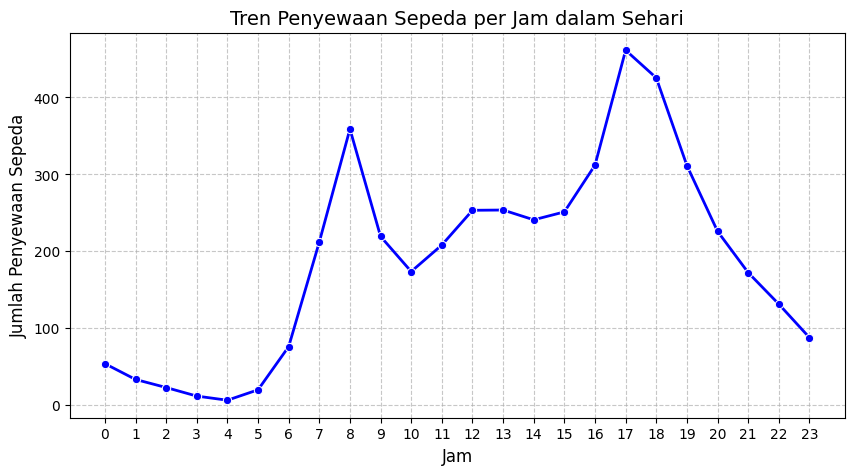

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_hour, x="hr", y="cnt", ci=None, marker="o", color="blue", linewidth=2)
plt.title("Tren Penyewaan Sepeda per Jam dalam Sehari", fontsize=14)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Penyewaan sepeda tertinggi terjadi di musim gugur (Fall) dan terendah di musim semi (Spring).
- Penyewaan menurun drastis di malam hari dan mencapai titik terendah sekitar jam 3–4 pagi, sesuai dengan waktu istirahat kebanyakan orang.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

- Penyewaan sepeda paling banyak terjadi di musim gugur (Fall), kemungkinan karena cuaca yang nyaman untuk bersepeda.
- Penyewaan lebih rendah di musim semi (Spring), mungkin karena cuaca masih tidak stabil setelah musim dingin.

- Conclution pertanyaan 2

- Ada dua puncak utama: jam 8 pagi dan jam 5–6 sore, yang menunjukkan penggunaan sepeda sebagai alat transportasi utama saat orang pergi dan pulang kerja.
- Penyewaan sepeda menurun pada dini hari dan mencapai titik terendah sekitar jam 3–4 pagi, saat kebanyakan orang sedang tidur.